# Clustering Project on Mall Customers Segmentation 

## Overview

Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.



The reason for these clusters is to help identify those customers who would be interested in certain products, offers and services. The store may strategize its offerings in such a way that it targets only right customers for specific products. This helps in creating a win-win situation for both the store (in terms of revenue and more customers through customer recommendation) and the customer
(discounts, offers, reward points, gifts, etc).

## Business Objective :

To create Customer cluster to identify the different types of customers

So according to some pattern we will be classifying the Customers into few clusters according to some similar traits.

## Importing Basic Libraries 

In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                   
import seaborn as sns                       
import pandas as pd                         
import numpy as np   
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset 

In [2]:
data_df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
data_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Dictionary :

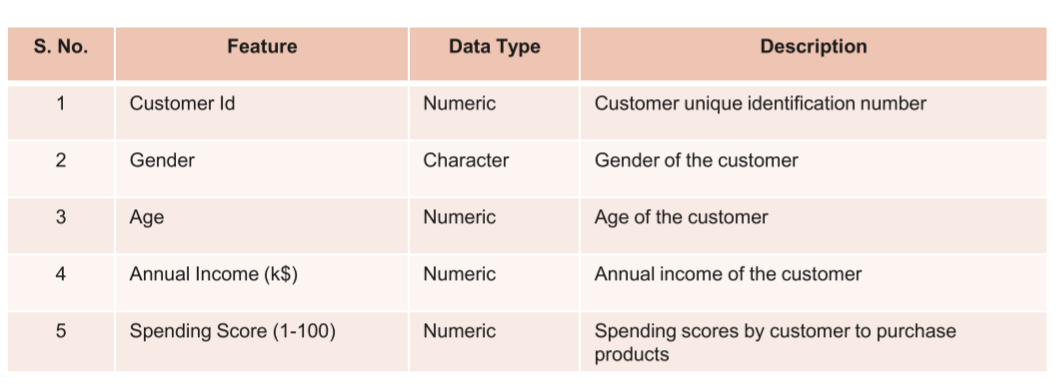

## Data Exploration :

Info () : Gives information about the dataset such as columns, not null value counts , data type , size of file and shape of data 

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Shape of the Dataset

In [4]:
data_df.shape

(200, 5)

### Summarizing the dataset 

In [5]:
data_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Columns :

In [6]:
data_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Missing values 

In [7]:
data_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No Null value 

### Categorizing Data

In [8]:
from tabulate import tabulate
cat=[]
con=[]
for i in data_df.columns: 
    if data_df[i].nunique()>10:
        con.append(i)
    else: 
        cat.append(i)  
print(tabulate({'cat':cat,'con':con},headers=['Categorical','Continuous']))         

Categorical    Continuous
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


### Unique Values in each columns 

In [9]:
for i in data_df.columns:
    print(i, ':',data_df[i].nunique())

CustomerID : 200
Gender : 2
Age : 51
Annual Income (k$) : 64
Spending Score (1-100) : 84


In [10]:
for i in data_df.columns:
    if data_df[i].nunique()<10:
        print(i,data_df[i].unique())

Gender ['Male' 'Female']


## Visualizing Categorical and Continuous Variable 

### Categorical

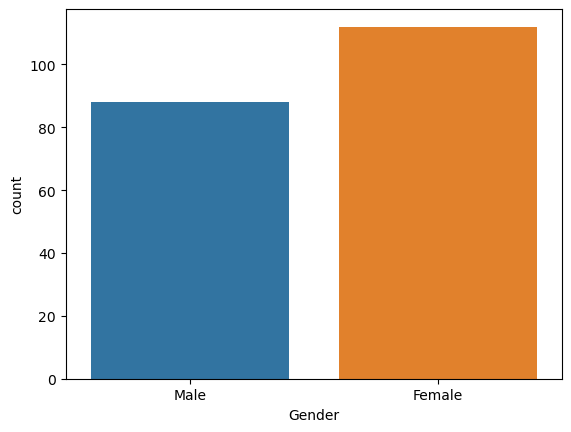

In [11]:
sns.countplot(data=data_df,x='Gender');

More number of female customers are there as female often shops more than the male so yeah they can be in focus too .

### Continous 

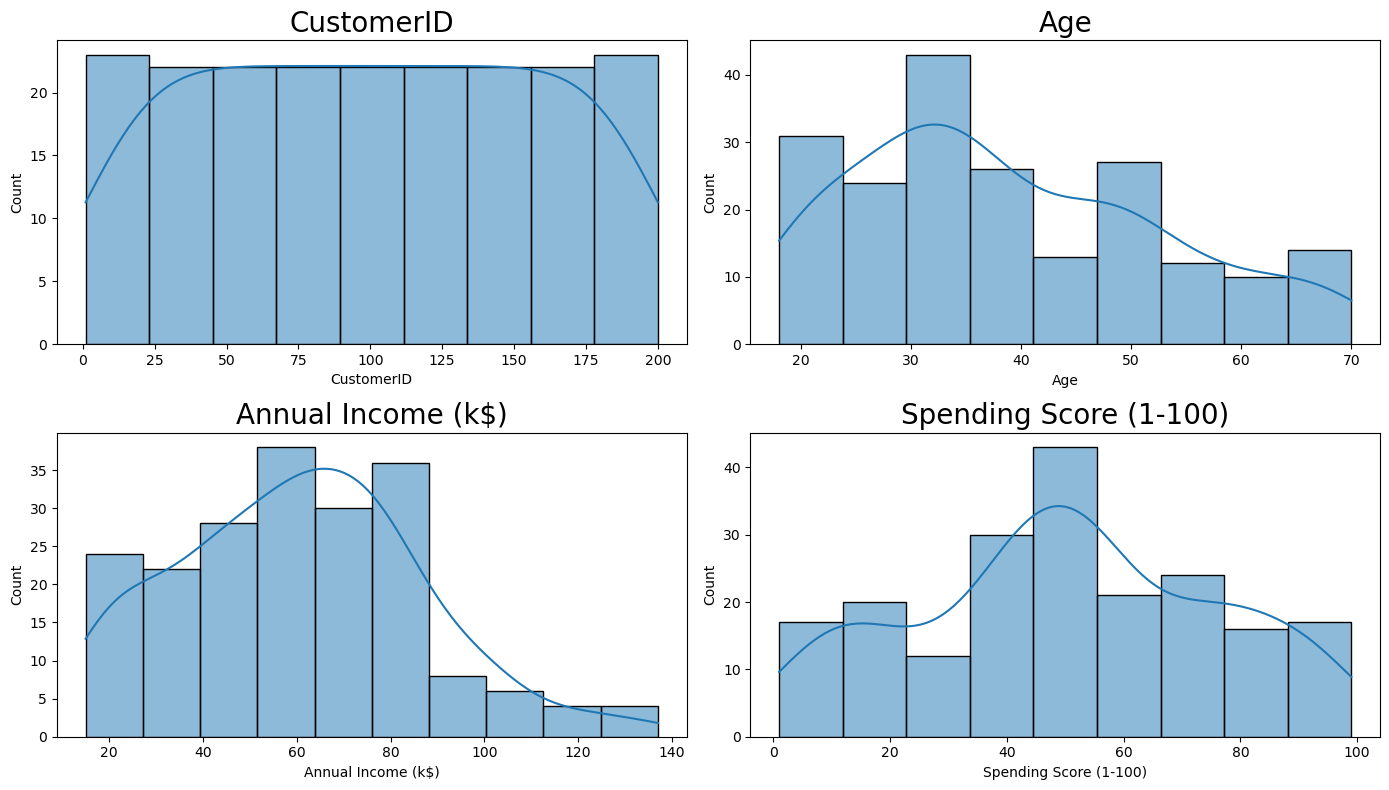

In [12]:
r=2
c=2
figs,axes=plt.subplots(r,c,figsize=(14,8),tight_layout=True)
dataa=data_df.select_dtypes(exclude='object')
for i , ax  in zip (dataa.columns,axes.flatten()):
    sns.histplot(data=dataa,x=i,kde=True,ax=ax)
    ax.set_title(i,fontdict={'size':20})
plt.show()

## Note:-

### Our Data have a unique rows identifier thats id , so we could drop the Id column and this will not impact our classification model and would help us understand the data better 

In [13]:
data_df=data_df.drop(columns='CustomerID')
data_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Going to understand columns one by one in details :

## $$\;\;\;\;  Exploratory \  Data  \ Analysis \ of  \ Variables$$

### Spending Score Vs Annual Income 

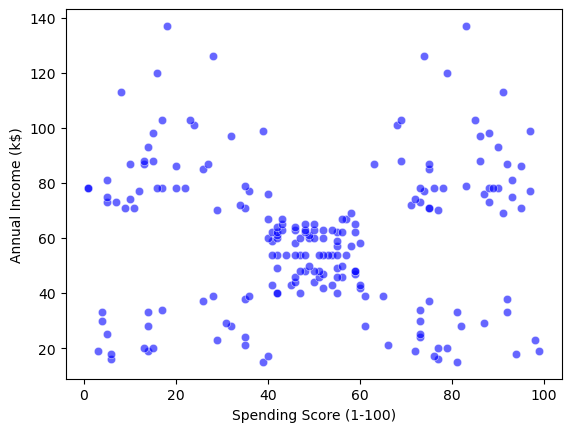

In [14]:
sns.scatterplot(data=data_df,x=data_df['Spending Score (1-100)'],y=data_df['Annual Income (k$)'],alpha=0.6,color='blue');

The Scatter Plot suggest that we using these two features we can classify customers into visible segments.

### Age vs Annual Income

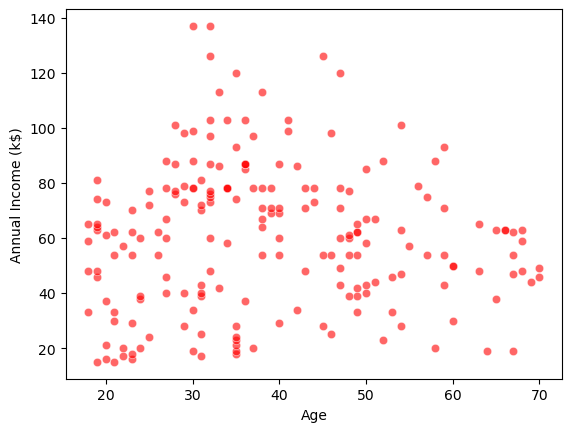

In [15]:
sns.scatterplot(data=data_df
,x=data_df['Age'],y=data_df['Annual Income (k$)'],alpha=0.6,color='red');

Based on these two feature we doesnt see any visual segments of customer so we might not consider age in our further analysis .

### Age vs Spending Score 

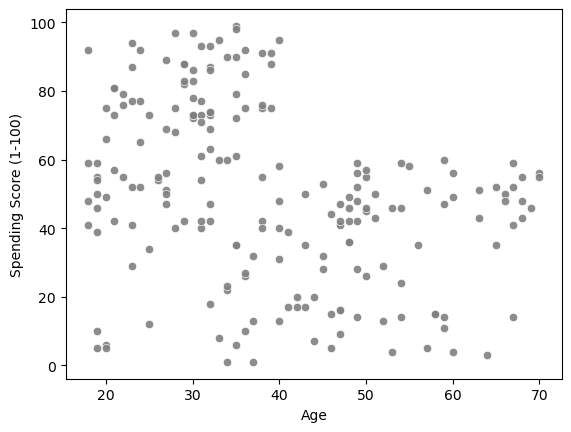

In [16]:
sns.scatterplot(data=data_df,x=data_df
['Age'],y=data_df['Spending Score (1-100)'],alpha=0.9,color='grey');

Based on these two feature we doesnt see any visual segments of customer so we might not consider age in our further analysis 

### Age and Gender 

<AxesSubplot:xlabel='Age', ylabel='Count'>

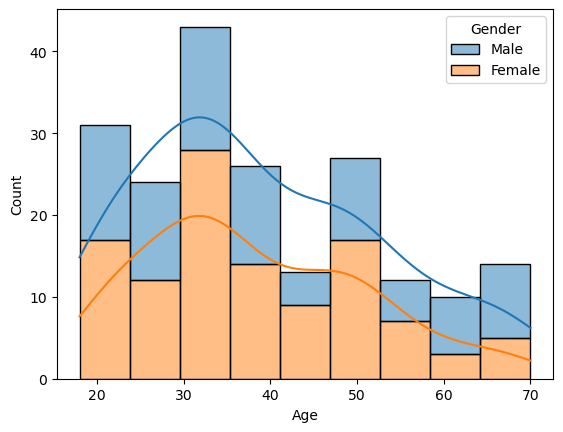

In [17]:
sns.histplot(data=data_df,x='Age',hue='Gender',kde=True,multiple='stack')

Young people shop more and who are kinda aged bewteen 30-40 and these are segments of people who also earns well enough .

## $$\;\;\;\;  Bivariate \ Analysis $$

### Spending score | Annual Income | Gender 

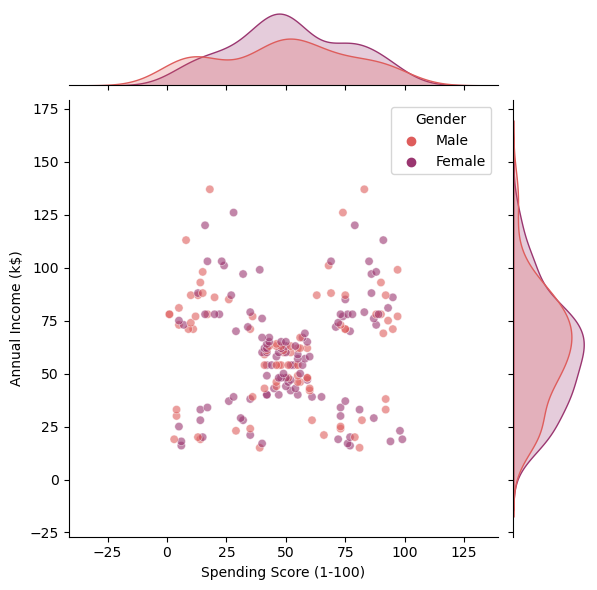

In [18]:
sns.jointplot(data=data_df,x=data_df['Spending Score (1-100)'],y=data_df['Annual Income (k$)'],hue='Gender',alpha=0.6,color='blue',palette='flare');

Gender is not affecting the segmnents so we can also drop Gender Feature from Further Analysis.

### Age Vs Spending Score Hue=Gender

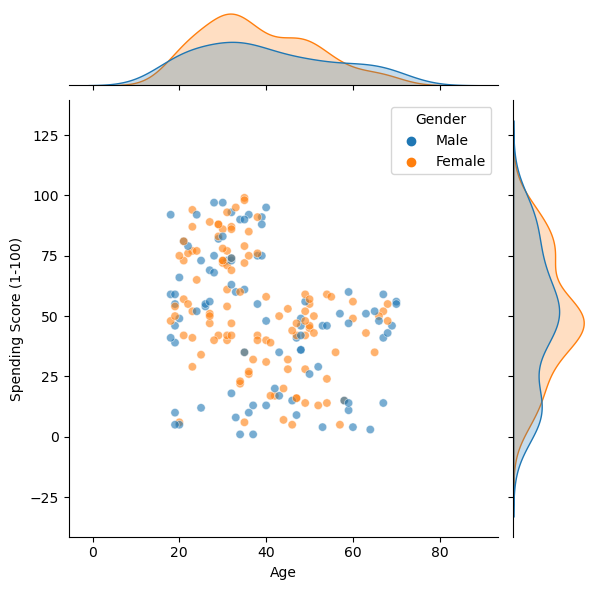

In [19]:
sns.jointplot(data=data_df,x=data_df['Age'],y=data_df['Spending Score (1-100)'],hue='Gender',alpha=0.6);

With Age No distinguisbale Cluster are there so we would o ahead with  Annual Income and Spending score to make our clusters.

### Age | Annual Income  | Gender

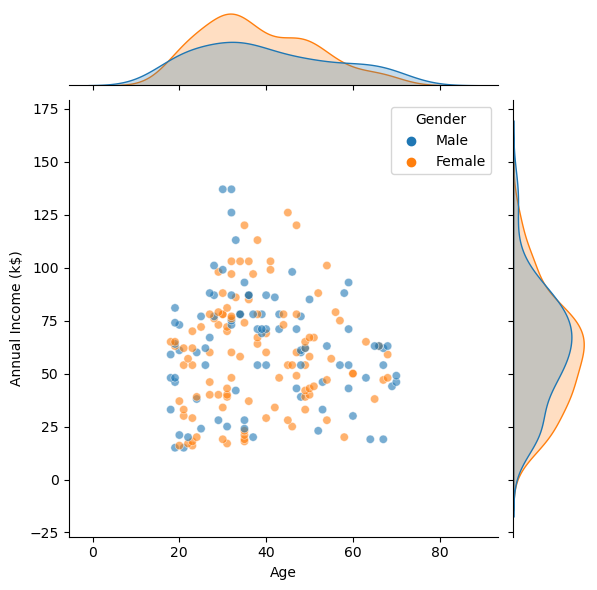

In [20]:
sns.jointplot(data=data_df,x=data_df['Age'],y=data_df['Annual Income (k$)'],hue='Gender',alpha=0.6);

### Pairplot 

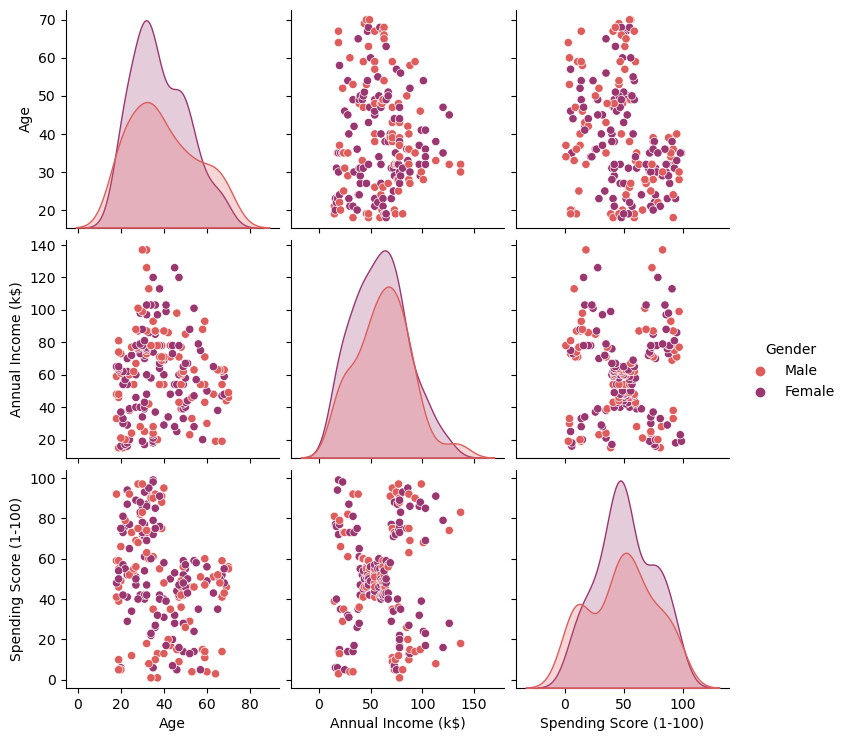

In [21]:
sns.pairplot(data=data_df,palette='flare',hue='Gender')

Analysis :

Going with Annual Income and Spending Score to cluster the Mall Customers into different Segments :

## Data to Train the Model 

In [22]:
X=data_df.iloc[:,[2,3]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Data Scaling 


Prerequite in Kmeans model to Scale the data as we would be working with the Distance and hence data should be on equivalent scale .

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler= StandardScaler()
X2=X.copy()
X1=scaler.fit_transform(X)
X=pd.DataFrame(X1, columns=X2.columns)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# Models:

# 1. KMeans

In [25]:
from sklearn.cluster import KMeans
import numpy as np

### Finding the Optimum Value of K 

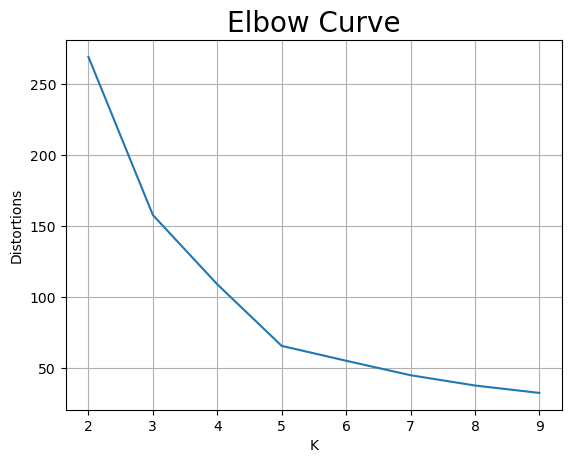

In [26]:
wcss=[]
for i in range (2,10):
    model=KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(2,10),wcss)    
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distortions')
plt.title("Elbow Curve",fontdict={'size':20})
plt.show()

Within Cluster Sum of Squares is the average of distnace of all the datapoints within a cluster from centroids and the least the better

### Silhoute Score 

In [27]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [28]:
k=[2,3,4,5,6,7,8,9,10]

for i in k:
    modelk=KMeans(n_clusters=i)
    labelk=modelk.fit_predict(X)

    sil=silhouette_score(X,labelk)

    print('for K {} the average silhouette score is {}'.format(i,sil))

for K 2 the average silhouette score is 0.3146990432802128
for K 3 the average silhouette score is 0.46658474419000145
for K 4 the average silhouette score is 0.4939069237513199
for K 5 the average silhouette score is 0.5546571631111091
for K 6 the average silhouette score is 0.5398800926790663
for K 7 the average silhouette score is 0.5281492781108291
for K 8 the average silhouette score is 0.45620041477955225
for K 9 the average silhouette score is 0.4570853966942764
for K 10 the average silhouette score is 0.43950009348860775


### Visualizing the Silhoute Score :

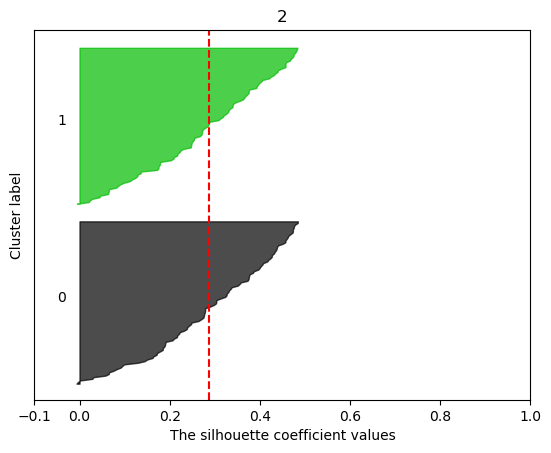

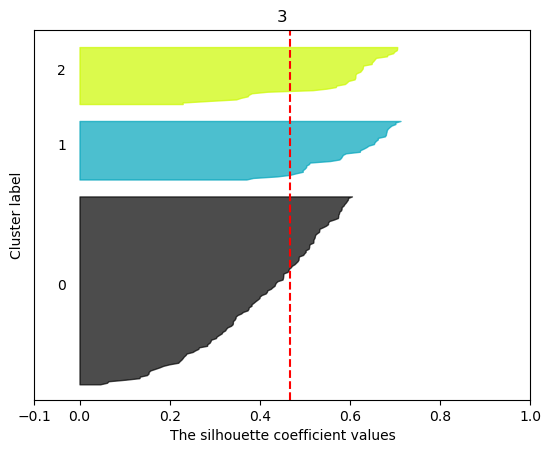

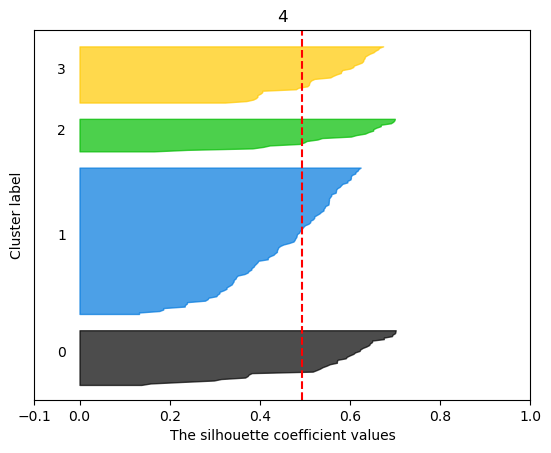

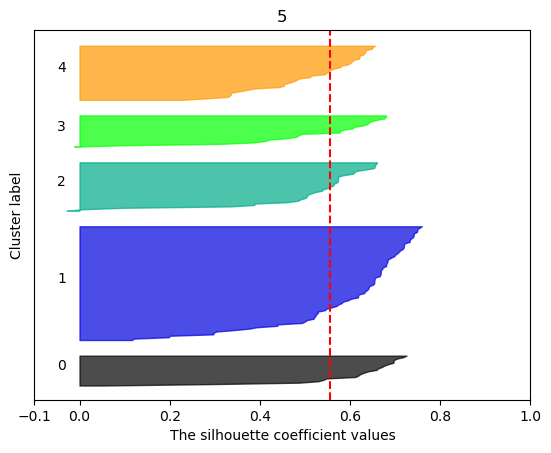

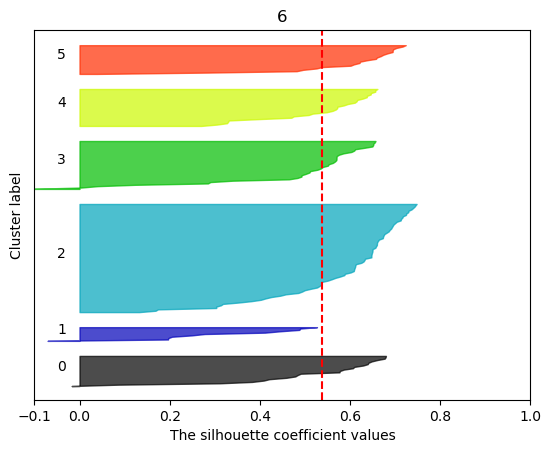

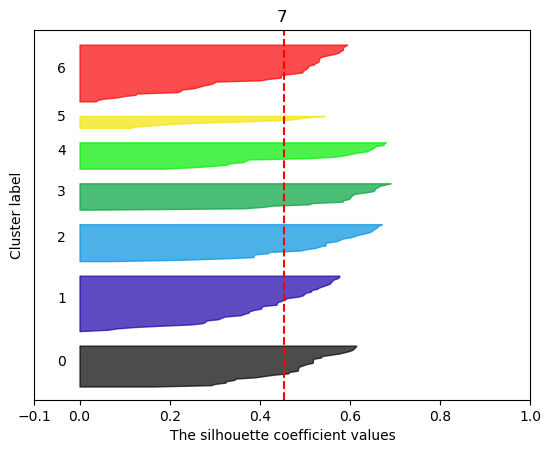

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    # print("For n_clusters =", n_clusters,
    #       "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    plt.title(n_clusters)
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

for k=5 we are getting less error sum and the better Silhoute Value so we will make model taking K=5.

In [30]:
model=KMeans(n_clusters=5)
model.fit(X)
label=model.predict(X)
np.unique(label)

array([0, 1, 2, 3, 4])

### Appending to DataFrame 

In [31]:
X['Cluster']=label
data_df['Cluster']=label

### Finding the Centroids 

In [32]:
cluster_centroid=model.cluster_centers_
model.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907]])

In [33]:
names=[]
scores=[]
names.append(model)
scores.append(silhouette_score(X,label))

### Visulaizing the Clusters and Centroids  :

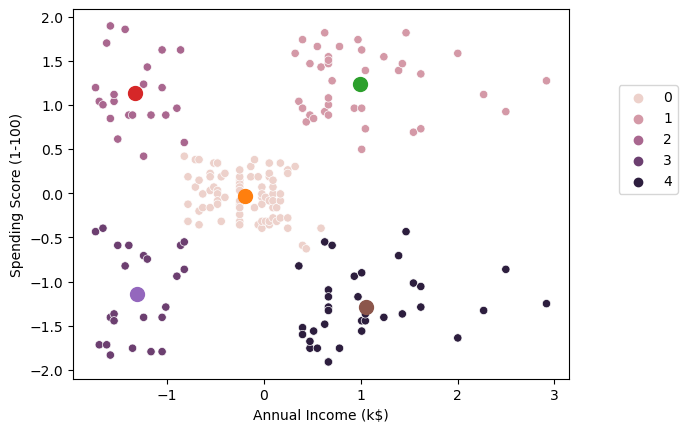

In [34]:
sns.scatterplot(data=X,x='Annual Income (k$)',y='Spending Score (1-100)',hue=label)
for i in model.cluster_centers_:
    plt.scatter(x=i[0],y=i[1],s=100)
plt.legend(loc=(1.1,0.5))    
plt.show()

### Naming Our Customer Segments : 

In [35]:
X['Customer Segment']=np.NaN
X.loc[X['Cluster']==0,'Customer Segment']='Average Standard'
X.loc[X['Cluster']==1,'Customer Segment']='Target Customers'
X.loc[X['Cluster']==2,'Customer Segment']='Over Spenders'
X.loc[X['Cluster']==3,'Customer Segment']='Careful Spenders'
X.loc[X['Cluster']==4,'Customer Segment']='Sensible Spenders'

### Visualizing the data :

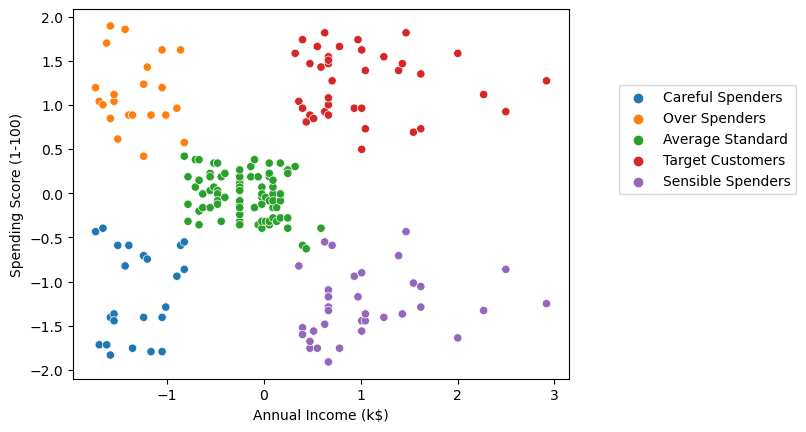

In [36]:
sns.scatterplot(data=X,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Customer Segment')
plt.legend(loc=(1.1,0.5))    
plt.show()

### Appending in main dataset:

In [37]:
data_df['Customer Segment']=np.NaN
data_df.loc[X['Cluster']==0,'Customer Segment']='Average Standard'
data_df.loc[X['Cluster']==1,'Customer Segment']='Target Customers'
data_df.loc[X['Cluster']==2,'Customer Segment']='Over Spenders'
data_df.loc[X['Cluster']==3,'Customer Segment']='Careful Spenders'
data_df.loc[X['Cluster']==4,'Customer Segment']='Sensible Spenders'
data_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer Segment
0,Male,19,15,39,3,Careful Spenders
1,Male,21,15,81,2,Over Spenders
2,Female,20,16,6,3,Careful Spenders
3,Female,23,16,77,2,Over Spenders
4,Female,31,17,40,3,Careful Spenders


### Plot the Centroid and Dataset.

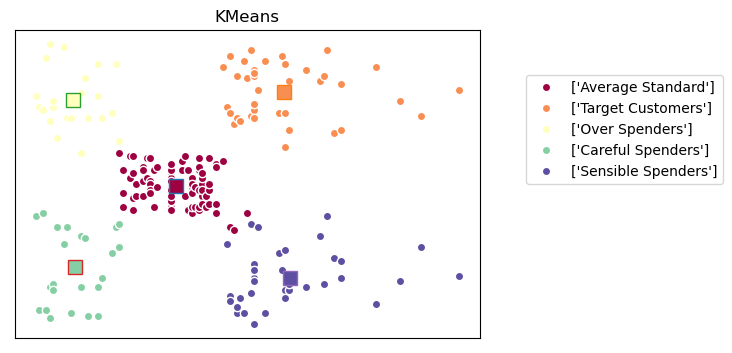

In [38]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(label))))
ax = fig.add_subplot(1, 1, 1)

for k , col in zip(range(len(np.unique(label))),colors):
    
    centroid=cluster_centroid[k]
    ax.plot(X.loc[X['Cluster']==k,X.columns[0]],X.loc[X['Cluster']==k,X.columns[1]],'w',markerfacecolor=col,marker='o',label=X.loc[X['Cluster']==k,'Customer Segment'].unique())
    ax.plot(centroid[0],centroid[1],marker='s',markersize=10,markerfacecolor=col)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.legend(loc=(1.1,0.5))
plt.show()        

### Printing Unique Dataset

In [39]:
for i , y in data_df.groupby('Cluster'):
    print('\n****************Cluster: ',i,'**********************\n')
    print(y)


****************Cluster:  0 **********************

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
43   Female   31                  39                      61        0   
46   Female   50                  40                      55        0   
47   Female   27                  40                      47        0   
48   Female   29                  40                      42        0   
49   Female   31                  40                      42        0   
..      ...  ...                 ...                     ...      ...   
121  Female   38                  67                      40        0   
122  Female   40                  69                      58        0   
126    Male   43                  71                      35        0   
132  Female   25                  72                      34        0   
142  Female   28                  76                      40        0   

     Customer Segment  
43   Average Standard  
46   Average Standard 

# Model 2 : AgglomerativeClustering

In [40]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [41]:
modelagg=AgglomerativeClustering()

In [42]:
names.append(modelagg)

In [43]:
X_agg=data_df.iloc[:,[2,3]]
X_agg

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [44]:
X_agg.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [45]:
X2_agg=X_agg.copy()
X1_agg=scaler.fit_transform(X2_agg)
X_agg=pd.DataFrame(X1_agg, columns=X2_agg.columns)
X_agg.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Making Dendogram 

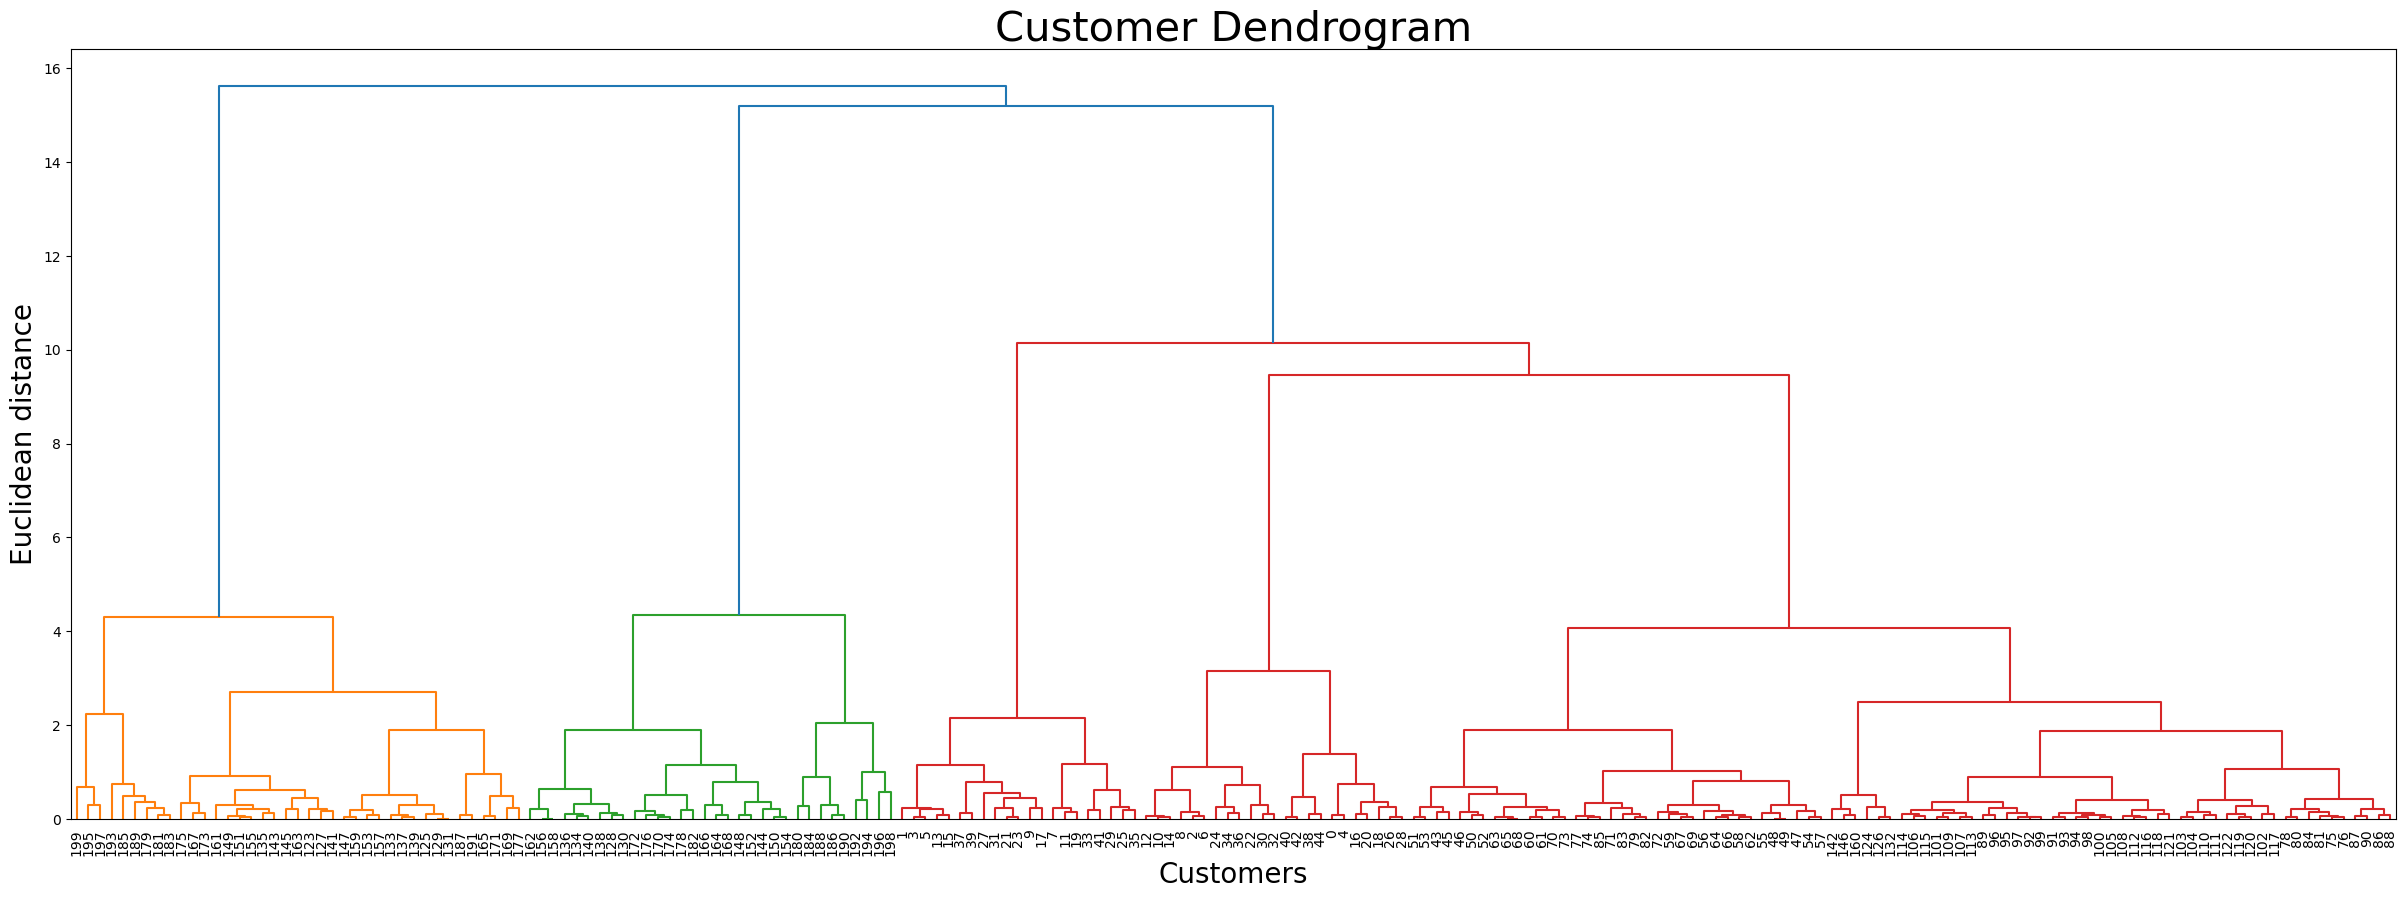

In [46]:
plt.figure(figsize=(30,10))
dendrogrm=sch.dendrogram(sch.linkage(X_agg,method='ward'),labels=data_df.index)
ax=plt.gca()
ax.tick_params(axis='x',which='major',labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance',fontsize=20)
plt.show()

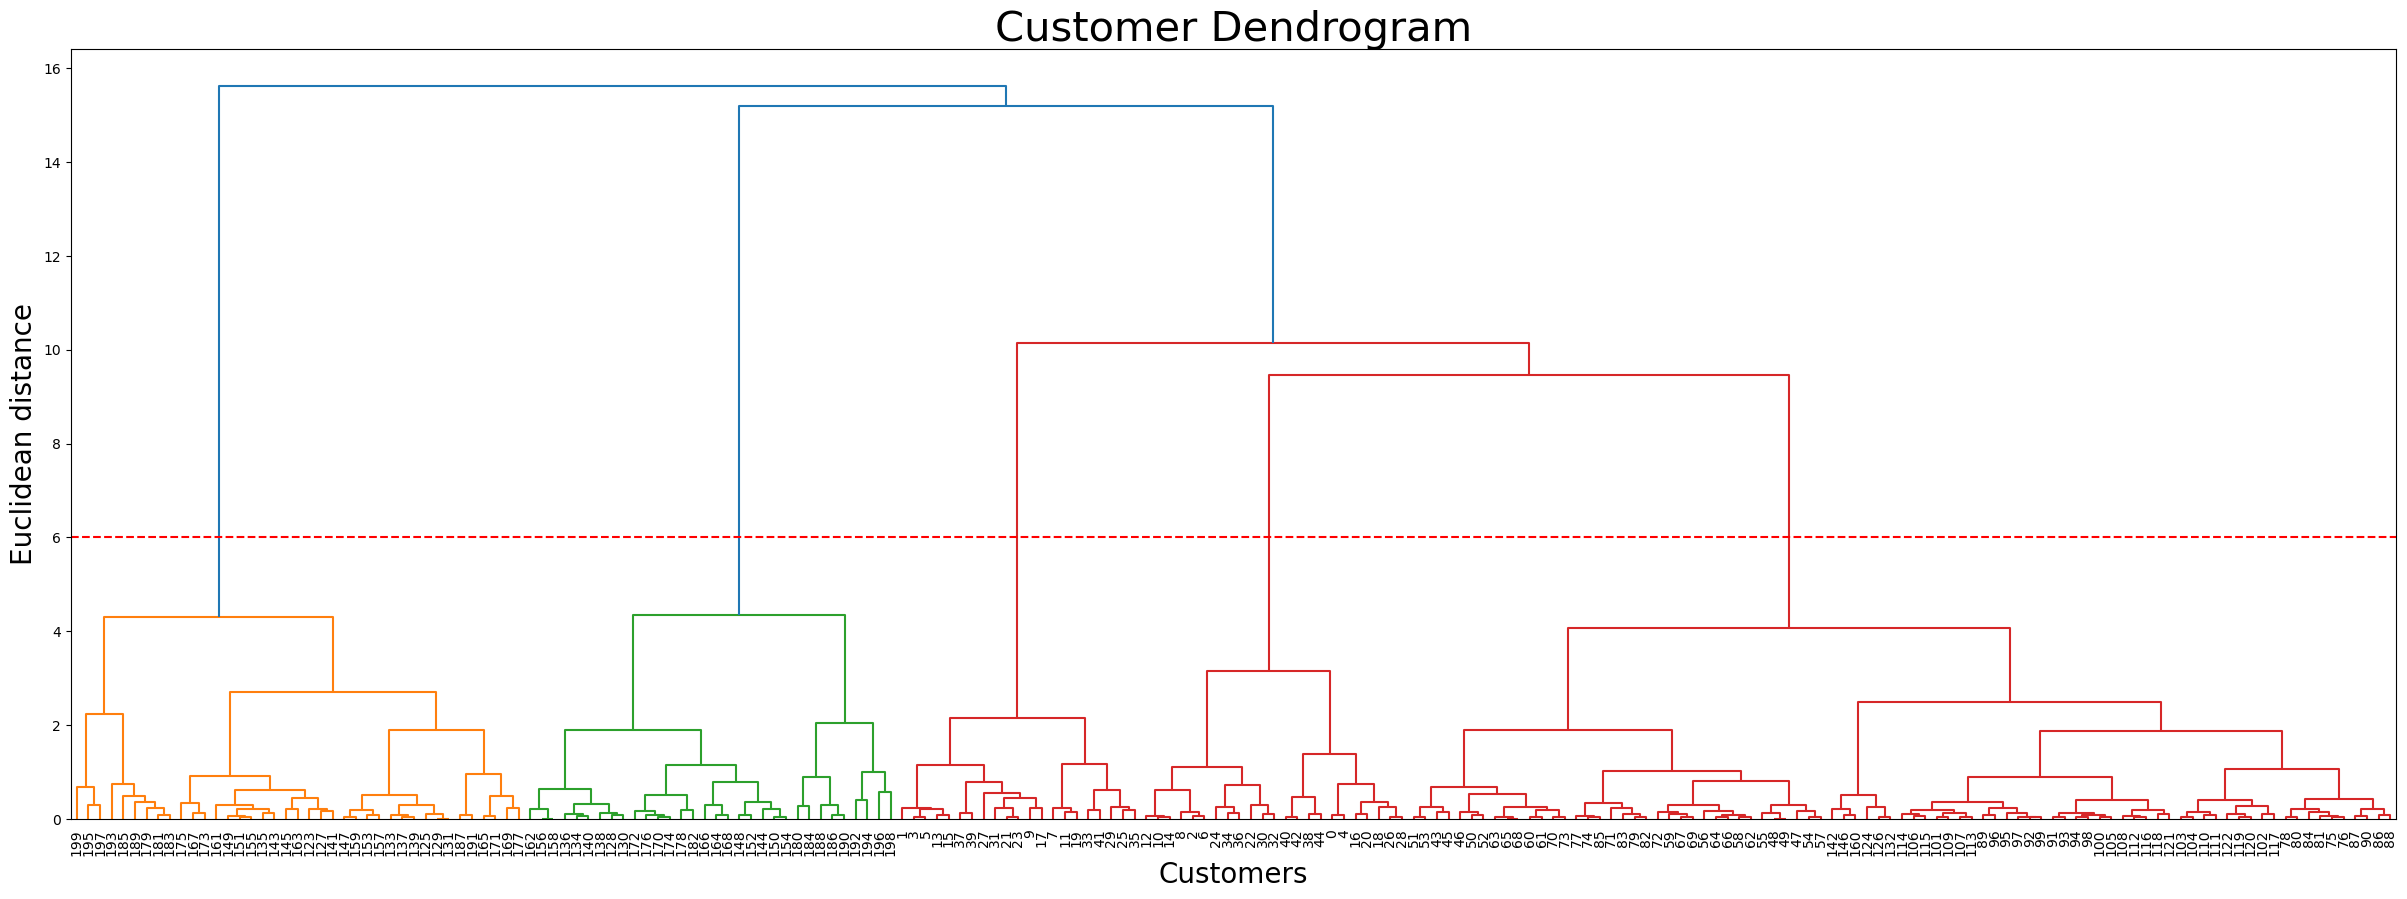

In [47]:
plt.figure(figsize=(30,10))
dendrogrm=sch.dendrogram(sch.linkage(X_agg,method='ward'),labels=data_df.index)
ax=plt.gca()
ax.tick_params(axis='x',which='major',labelsize=10)
plt.axhline(y=6,color='red',linestyle='--')
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance',fontsize=20)
plt.show()

So we can again make 5 cluster that are properly distinguishable

In [48]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X_agg)
np.unique(y_hc)

array([0, 1, 2, 3, 4], dtype=int64)

In [49]:
print('The Silhouette Score for Agglomerative Clustering is :',silhouette_score(X_agg,y_hc))

The Silhouette Score for Agglomerative Clustering is : 0.5538089226688662


In [50]:
scores.append(silhouette_score(X_agg,y_hc))

In [51]:
X_agg['Cluster']=y_hc
X_agg.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4


### Visualising Clusters

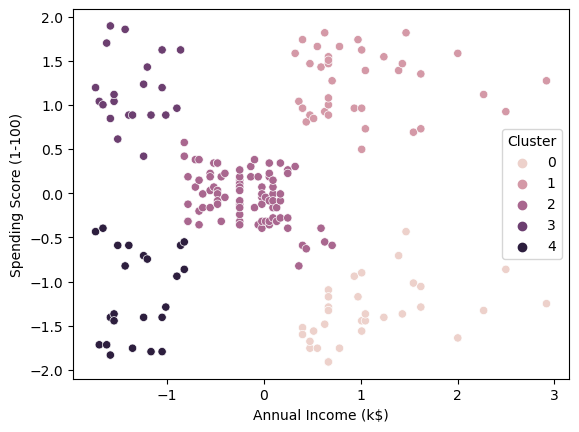

In [52]:
sns.scatterplot(data=X_agg,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster');

### Naming our Customer Segments: 

In [53]:
X_agg['Customer Segment']=np.NaN
X_agg.loc[X['Cluster']==0,'Customer Segment']='Average Standard'
X_agg.loc[X['Cluster']==1,'Customer Segment']='Target Customers'
X_agg.loc[X['Cluster']==2,'Customer Segment']='Over Spenders'
X_agg.loc[X['Cluster']==3,'Customer Segment']='Careful Spenders'
X_agg.loc[X['Cluster']==4,'Customer Segment']='Sensible Spenders'
X_agg.head()

,Annual Income (k$),Spending Score (1-100),Cluster,Customer Segment
0,-1.738999,-0.434801,4,Careful Spenders
1,-1.738999,1.195704,3,Over Spenders
2,-1.700830,-1.715913,4,Careful Spenders
3,-1.700830,1.040418,3,Over Spenders
4,-1.662660,-0.395980,4,Careful Spenders


### Visuals 

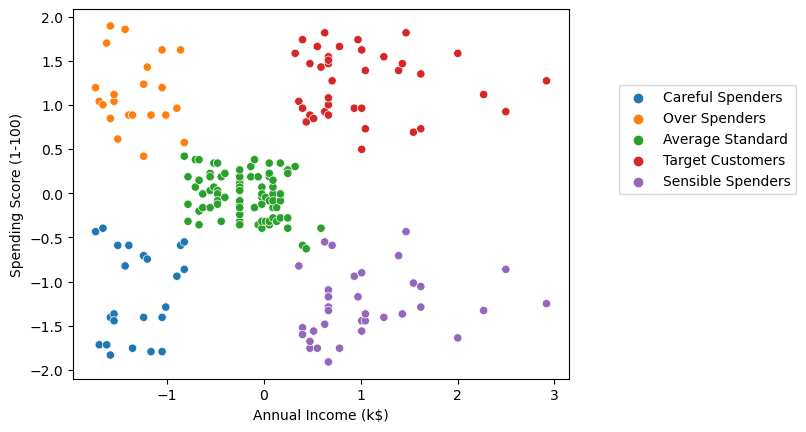

In [54]:
sns.scatterplot(data=X_agg,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Customer Segment')
plt.legend(loc=(1.1,0.5))
plt.show()

## Interactive Aggolomerative Clustering :

In [55]:
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [56]:
X_df=data_df.iloc[:,[1,2,3]]
scaler= StandardScaler()
X2_df=X_df.copy()
X1_df=scaler.fit_transform(X_df)
X_df=X1_df

def hier(n=5,affinity='manhattan',linkage='complete',grid=False,column1=1,column2=2):
    model1=AgglomerativeClustering(n_clusters=n,affinity=affinity,linkage=linkage)
    y_pred=model1.fit_predict(X_df)
    print('Unique Classes are :',np.unique(y_pred))
    colors = plt.cm.Spectral(np.linspace(0, 1,n))
    print('The Silhoutee Score is ',(silhouette_score(X_df,y_pred)))
    for i,c  in zip(np.unique(y_pred),colors):
        plt.scatter(X_df[y_pred==i,column1],X_df[y_pred==i,column2],color=c)
        plt.tight_layout()

    plt.grid(grid)
    plt.show()   


In [57]:
import ipywidgets
ipywidgets.interact(hier,n=(2,10,1),column1=(0,2,1),column2=(0,2,1),linkage=['ward','complete','single','average'],grid=False,affinity=['euclidean','l1','l2','manhattan','cosine','precomputed'])

interactive(children=(IntSlider(value=5, description='n', max=10, min=2), Dropdown(description='affinity', ind…

<function __main__.hier(n=5, affinity='manhattan', linkage='complete', grid=False, column1=1, column2=2)>

By Taking age we are not getting well distinguised Clusters again so we were right not considering the Age as a fetaure .

# 3. DBSCAN

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
data_db=data_df.iloc[:,[2,3]]
data_db.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Scaling data_db

In [60]:
scaler= StandardScaler()
data_db1=data_db.copy()
data_db2=scaler.fit_transform(data_db1)
data_db=pd.DataFrame(data_db2,columns=data_db1.columns)
data_db.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Finding best epsilon value:

In [61]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_db.iloc[:,[0,1]])
distances, indices = nbrs.kneighbors(data_db.iloc[:,[0,1]])

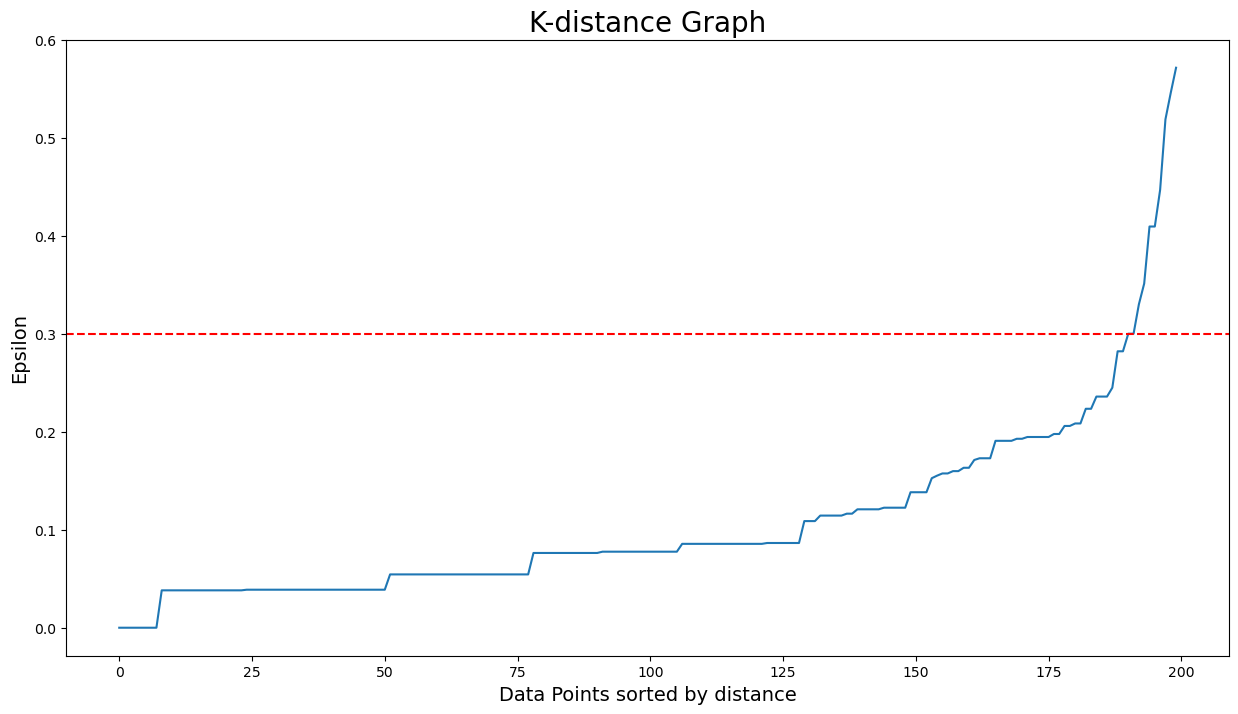

In [62]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.3, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

E=0.25

### Best Min Sample Value :

In [63]:
eps=0.25
for i in range(2,10):
    cluster=DBSCAN(eps=eps,min_samples=i)
    cluster_labels=cluster.fit_predict(data_db)
    print('Eps : ',eps , '| Min Samples :',i , '| No of Cluster',len(np.unique(cluster_labels)))

Eps :  0.25 | Min Samples : 2 | No of Cluster 15
Eps :  0.25 | Min Samples : 3 | No of Cluster 13
Eps :  0.25 | Min Samples : 4 | No of Cluster 8
Eps :  0.25 | Min Samples : 5 | No of Cluster 7
Eps :  0.25 | Min Samples : 6 | No of Cluster 7
Eps :  0.25 | Min Samples : 7 | No of Cluster 6
Eps :  0.25 | Min Samples : 8 | No of Cluster 6
Eps :  0.25 | Min Samples : 9 | No of Cluster 4


### Min Sample should be considered 7 and higher 

## Creating a model

In [64]:
model_db=DBSCAN(eps=0.25,min_samples=7)
names.append(model_db)

In [65]:
labels=model_db.fit_predict(data_db)
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

### Silhoute Score:

In [66]:
silhouette_score(data_db,labels)

0.16641347157780495

In [67]:
scores.append(silhouette_score(data_db,labels))

### labels :

In [68]:
data_db['Cluster']=labels

### Plot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

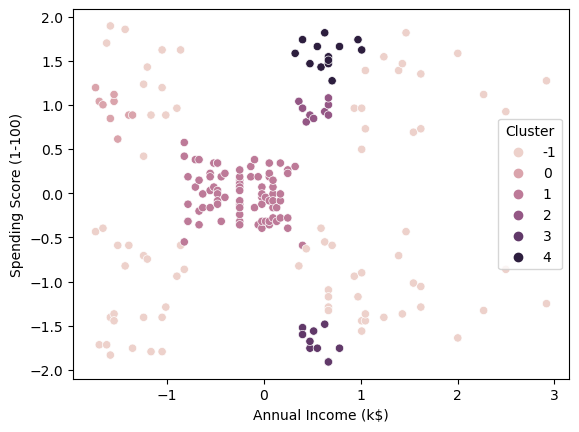

In [69]:
sns.scatterplot(data=data_db,x=data_db['Annual Income (k$)'],y=data_db['Spending Score (1-100)'],hue='Cluster')

### Interactive DBSCAN 

In [70]:
X_d=data_df.iloc[:,[1,2,3]]
scaler= StandardScaler()
X2_df=X_df.copy()
X1_df=scaler.fit_transform(X_df)
X_d=X1_df

def db(eps=.25,min_samples=7,grid=False,column1=1,column2=2):
    model1=DBSCAN(eps=eps,min_samples=min_samples)
    y_pred=model1.fit_predict(X_d)
    print('Unique Classes are :',np.unique(y_pred))
    colors = plt.cm.Spectral(np.linspace(0, 1,len(np.unique(y_pred))))
    print('The Silhoutee Score is ',(silhouette_score(X_d,y_pred)))
    for i,c  in zip(np.unique(y_pred),colors):
        plt.scatter(X_d[y_pred==i,column1],X_d[y_pred==i,column2],color=c)
        plt.tight_layout()

    plt.grid(grid)
    plt.show()    

In [71]:
import ipywidgets
ipywidgets.interact(db,eps=(0,5,0.1),min_samples=(1,10,1),column1=(0,2,1),column2=(0,2,1))

interactive(children=(FloatSlider(value=0.25, description='eps', max=5.0), IntSlider(value=7, description='min…

<function __main__.db(eps=0.25, min_samples=7, grid=False, column1=1, column2=2)>

### Note

We would not be baking customer segments for the DBSCAN model because the silhoute score is negative and even a lot of noise is there so this is not the best model to choose for the mall segments .

## Comparing all the models:

In [72]:
name=['KMeans','AgglomerativeClustering','DBSCAN']

In [73]:
comp=pd.DataFrame({'Name':name,'Scores':scores})
comp

,Name,Scores
0,KMeans,0.690578
1,AgglomerativeClustering,0.553809
2,DBSCAN,0.166413


<AxesSubplot:xlabel='Name', ylabel='Scores'>

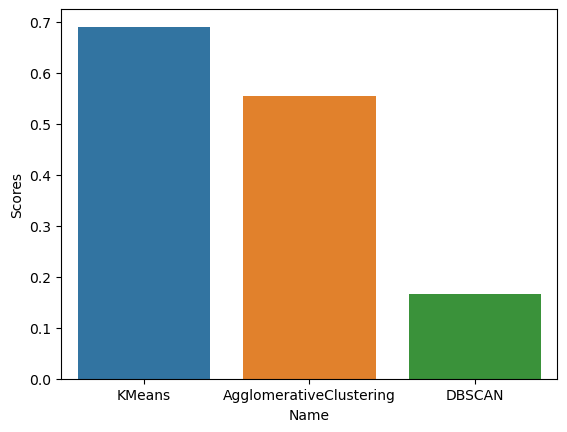

In [74]:
sns.barplot(data=comp,x=comp['Name'],y=comp['Scores'])

For clustering we can use the Kmeans Model to cluster customers into various segments .

# Customer Segments 

In [75]:
data_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer Segment
0,Male,19,15,39,3,Careful Spenders
1,Male,21,15,81,2,Over Spenders
2,Female,20,16,6,3,Careful Spenders
3,Female,23,16,77,2,Over Spenders
4,Female,31,17,40,3,Careful Spenders


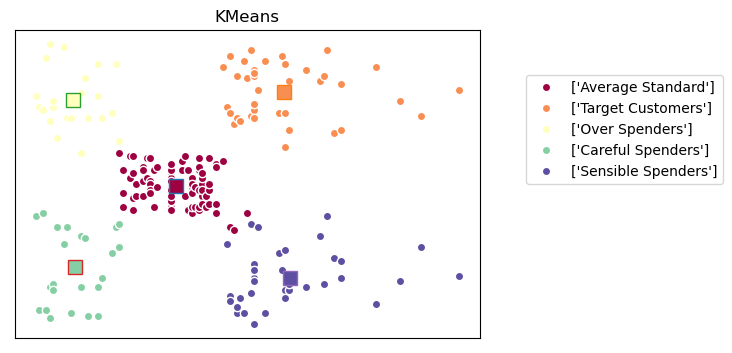

In [76]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(label))))
ax = fig.add_subplot(1, 1, 1)

for k , col in zip(range(len(np.unique(label))),colors):
    
    centroid=cluster_centroid[k]
    ax.plot(X.loc[X['Cluster']==k,X.columns[0]],X.loc[X['Cluster']==k,X.columns[1]],'w',markerfacecolor=col,marker='o',label=X.loc[X['Cluster']==k,'Customer Segment'].unique())
    ax.plot(centroid[0],centroid[1],marker='s',markersize=10,markerfacecolor=col)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.legend(loc=(1.1,0.5))
plt.show() 

### So we have classified our customers into 5 main segments -

#### Standard
#### Target
#### Over Spenders
#### Careful Spender
#### Sensible Spenders



We have divided them on the basis of the income and how much they spend so those who are earning well and also spending significantly can be potential target customers for the mall.



In [77]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , FunctionTransformer ,LabelEncoder
from ipywidgets import interact , widgets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA

## Interactive for Every Models:

In [78]:
con.remove('CustomerID')
data_df_inter=data_df.iloc[:,[0,1,2,3]]
data_df_inter.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [79]:
label=LabelEncoder()
data_df_inter['Gender']=label.fit_transform(data_df_inter["Gender"])

In [80]:
cols=con

def clustering(attributes=cols,scaler=MinMaxScaler(), dimension_reduction='pca', components=2, k=5, show='features',Model='KMeans',Eps=0.25,Min_samples=7,Affinity='euclidean',Linkage='ward',Palette='flare'):
    
    attributes = list(attributes)
    
    scaled_values = scaler.fit_transform(data_df_inter)



    components = min(components, len(cols))



    if dimension_reduction == 'pca':
        values = PCA(n_components=components).fit_transform(scaled_values)

    elif dimension_reduction == 'lda':
        values = LinearDiscriminantAnalysis(n_components=components).fit_transform(scaled_values)

    else: 
        scaled_values1 = scaler.fit_transform(data_df_inter)

        values = scaled_values1     


    if Model=='KMeans':
        cluster = KMeans(n_clusters=k).fit_predict(values)
        print('\nThe Unique Clusters are :',np.unique(cluster))
        print('The Silhoutee Score is : ',silhouette_score(values,cluster))

    elif Model=='DBSCAN':
        cluster=DBSCAN(eps=eps,min_samples=Min_samples).fit_predict(values)  
        print('\nThe Unique Clusters are :',np.unique(cluster))
        print('The Silhoutee Score is : ',silhouette_score(values,cluster))

    elif Model=='AgglomerativeClustering' :
        cluste=AgglomerativeClustering(n_clusters=k,affinity=Affinity,linkage=Linkage).fit_predict(values)
        print('\nThe Unique Clusters are :',np.unique(cluster))
        print('The Silhoutee Score is : ',silhouette_score(values,cluster))


    if show == 'features':
        df_plot = data_df_inter.copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)

    df_plot['cluster'] = cluster

    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'],palette=Palette)
    plt.show()


style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')


interact(clustering,attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols),
                                        description='Features', layout=layout, style=style,
                                        disabled=False,continuous_update=False,orientation='horizontal',
                                        lreadout=True),

            scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))],
                                        description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True),

            dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('LDA', 'lda'), ('without', None)],
                                        description='Dimensionality Reduction', layout=layout, style=style,
                                        disabled=False,continuous_update=False,orientation='horizontal',readout=True),

            components=widgets.SelectionSlider(options=range(1, 10), value=2,description='PCA components',
                                        layout=layout, style=style,
                                        disabled=False,continuous_update=False,orientation='horizontal',readout=True),

            k=widgets.SelectionSlider(options=range(2, 8),description='k', layout=layout, style=style,
                                        disabled=False,continuous_update=False,orientation='horizontal',readout=True),

            show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show',
                                        layout=layout, style=style,
                                        disabled=False,continuous_update=False,orientation='horizontal',readout=True),

                                        Model=['KMeans','DBSCAN','AgglomerativeClustering'],
                                        Eps=(0,5,0.01),
                                        Linkage=['ward','complete','single','average'],
                                        Affinity=['euclidean','l1','l2','manhattan','cosine','precomputed'],
                                        Min_samples=(2,15,1),
                                        Palette=['pastel','faded','magma','viridis'])




interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2), layout=Layout(width='400px'), op…

<function __main__.clustering(attributes=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], scaler=MinMaxScaler(), dimension_reduction='pca', components=2, k=5, show='features', Model='KMeans', Eps=0.25, Min_samples=7, Affinity='euclidean', Linkage='ward', Palette='flare')>

# Recommendations:

#### The Mall can have more schemes so more youth will be attracted .
#### The Mall should have rewards facility for cutomers who shops more like the redeem points .
#### They can try having more shops in terms of variety and take perosnal feedback from customers as whcih segment to work on.
#### They should retain their customers by providing the unique type of shopping experince.


In [81]:
data_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer Segment
0,Male,19,15,39,3,Careful Spenders
1,Male,21,15,81,2,Over Spenders
2,Female,20,16,6,3,Careful Spenders
3,Female,23,16,77,2,Over Spenders
4,Female,31,17,40,3,Careful Spenders


In [82]:
data_df.iloc[:,[1,2,3,4]].groupby('Cluster').mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


<AxesSubplot:xlabel='Cluster'>

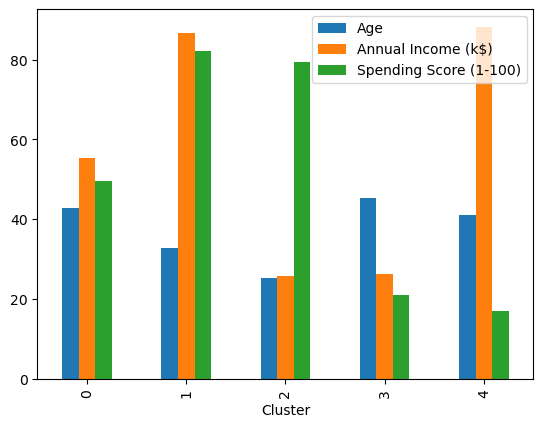

In [83]:
data_df.iloc[:,[1,2,3,4]].groupby('Cluster').mean().plot(kind='bar')

cagle
banking-lona
credit ConnectionAbortedError
retils

telecom-bundle Minutes
ecoomere


# Cluster 1: Low Expenditure 
older people
High income 

In [84]:
data_df.to_excel('Mall.xlsx')

In [85]:
# Analysis , logs  ,Scaling : Outier Treatment 